In [1]:
# Standard Library Imports
import os
import tarfile
import random

# Third-Party Library Imports
from PIL import Image
import matplotlib.pyplot as plt

# PyTorch Imports
import torch


In [2]:
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("Using CPU")

print(f"Using device: {device}")


PyTorch Version: 2.5.1+cpu
CUDA Available: False
Using CPU
Using device: cpu


In [3]:
dataset_dir = '../data/kvasir-instrument'
images_tar = os.path.join(dataset_dir, 'images.tar.gz')
masks_tar = os.path.join(dataset_dir, 'masks.tar.gz')
train_txt = os.path.join(dataset_dir, 'train.txt')
test_txt = os.path.join(dataset_dir, 'test.txt')
images_dir = os.path.join(dataset_dir, 'images')
masks_dir = os.path.join(dataset_dir, 'masks')

def extract_tar(tar_path, extract_path):
    if not os.path.exists(extract_path):
        with tarfile.open(tar_path, "r:gz") as tar:
            tar.extractall(path=extract_path)
            print(f"Extracted {tar_path}.")

def load_split(file_path):
    return [line.strip() for line in open(file_path, 'r')] if os.path.exists(file_path) else []

def verify_files(filenames, directory, extensions=('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
    return [os.path.join(directory, f + ext) for f in filenames for ext in extensions if os.path.exists(os.path.join(directory, f + ext))]

# Run extraction and verification
extract_tar(images_tar, images_dir)
extract_tar(masks_tar, masks_dir)
train_files = load_split(train_txt)
test_files = load_split(test_txt)
print(f"Train samples: {len(verify_files(train_files, images_dir))}")
print(f"Test samples: {len(verify_files(test_files, images_dir))}")


Train samples: 472
Test samples: 118


In [4]:
# Function to extract .tar.gz files with error handling
def extract_tar_gz(tar_path, extract_path):
    if not os.path.exists(tar_path):
        print(f"Error: '{tar_path}' does not exist.")
        return

    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
        try:
            with tarfile.open(tar_path, "r:gz") as tar:
                # Extract all members
                tar.extractall(path=extract_path)
                print(f"Extracted '{tar_path}' to '{extract_path}'.")

            # Move contents up if nested directories are present
            nested_dirs = [name for name in os.listdir(extract_path) if os.path.isdir(os.path.join(extract_path, name))]
            if len(nested_dirs) == 1:
                nested_dir_path = os.path.join(extract_path, nested_dirs[0])
                # Move all files from nested_dir_path to extract_path
                for filename in os.listdir(nested_dir_path):
                    os.rename(
                        os.path.join(nested_dir_path, filename),
                        os.path.join(extract_path, filename)
                    )
                # Remove the empty nested directory
                os.rmdir(nested_dir_path)
                print(f"Flattened nested directory '{nested_dir_path}'.")
        except tarfile.ReadError:
            print(f"Error: '{tar_path}' is not a valid tar.gz file or is corrupted.")
    else:
        print(f"Directory '{extract_path}' already exists. Skipping extraction.")


# Extract images
extract_tar_gz(images_tar, images_dir)

# Extract masks
extract_tar_gz(masks_tar, masks_dir)



Directory '../data/kvasir-instrument\images' already exists. Skipping extraction.
Directory '../data/kvasir-instrument\masks' already exists. Skipping extraction.


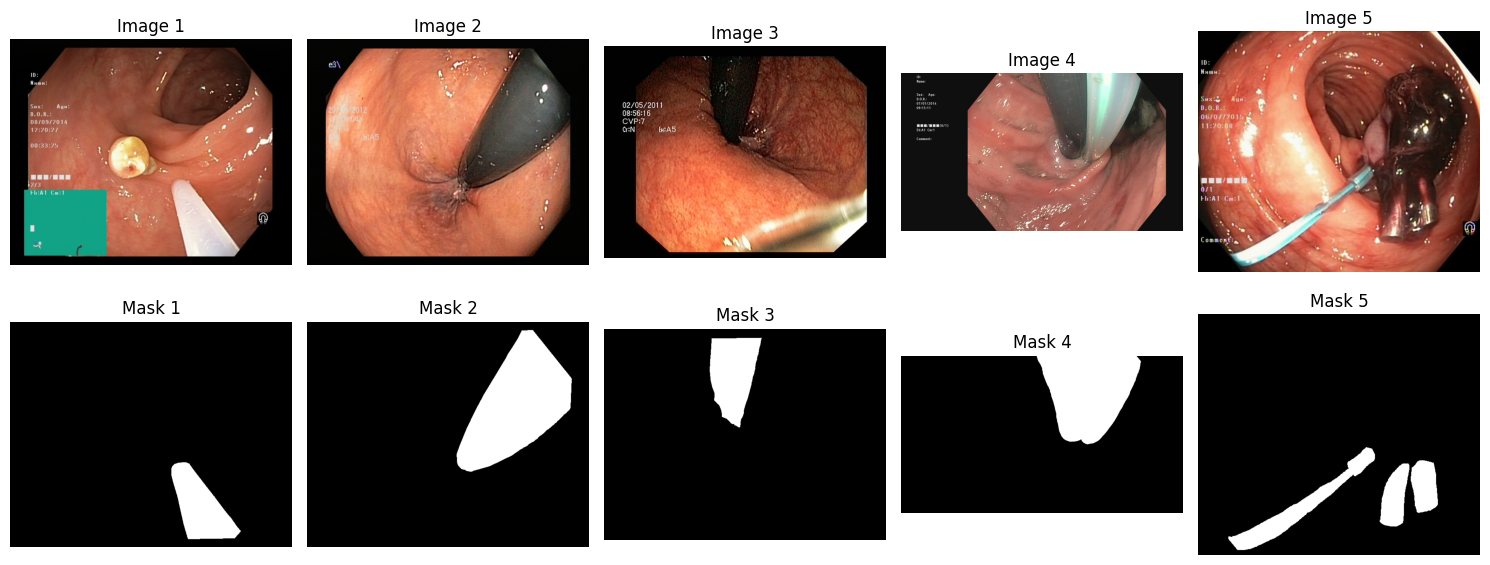

In [5]:
# Directory paths
images_dir = os.path.join('../data/kvasir-instrument', 'images')
masks_dir = os.path.join('../data/kvasir-instrument', 'masks')

# Fetch all image file paths
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Select 5 random images
random_images = random.sample(image_files, 5)

# Plotting
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

for i, img_file in enumerate(random_images):
    img_path = os.path.join(images_dir, img_file)
    mask_name = os.path.splitext(img_file)[0] + '.png'  # Match mask with .png extension
    mask_path = os.path.join(masks_dir, mask_name)
    
    # Load image and mask
    img = Image.open(img_path)
    mask = Image.open(mask_path) if os.path.exists(mask_path) else None
    
    # Display image
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Image {i+1}')
    
    # Display mask
    axs[1, i].imshow(mask, cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Mask {i+1}')


plt.tight_layout()
plt.show()
